<a href="https://colab.research.google.com/github/satya7669/Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

In [172]:
titanic_data = fetch_openml(name='titanic', version=1, as_frame=True)

In [173]:
df = titanic_data['data']

In [174]:
df['survived'] = titanic_data['target']

In [175]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [176]:
df['family'] = df['sibsp']+df['parch']

df.loc[df['family']>0,'travelled alone'] = 0
df.loc[df['family']==0,'travelled alone'] = 1

In [177]:
df['family'].head()

,family
0,0
1,3
2,3
3,3
4,3


In [178]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0


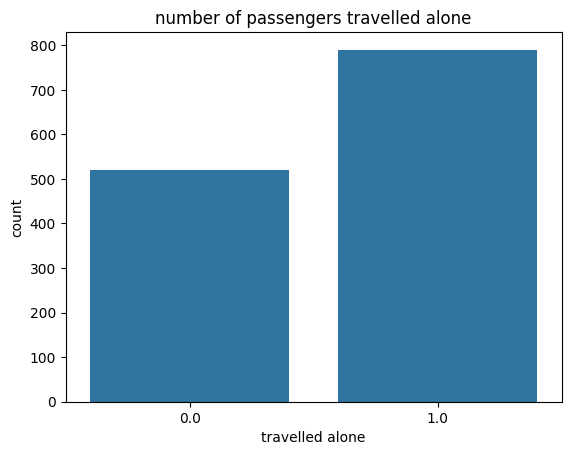

In [179]:
sns.countplot(x = 'travelled alone',data = df)
plt.title('number of passengers travelled alone')
plt.show()

<Axes: xlabel='survived', ylabel='count'>

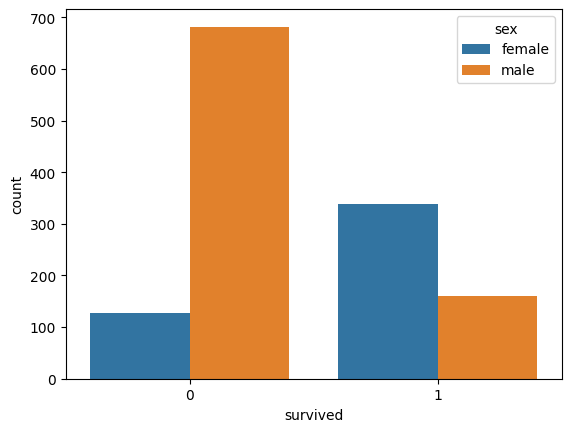

In [180]:
sns.countplot(x = 'survived',hue = 'sex',data = df)

<Axes: xlabel='survived', ylabel='count'>

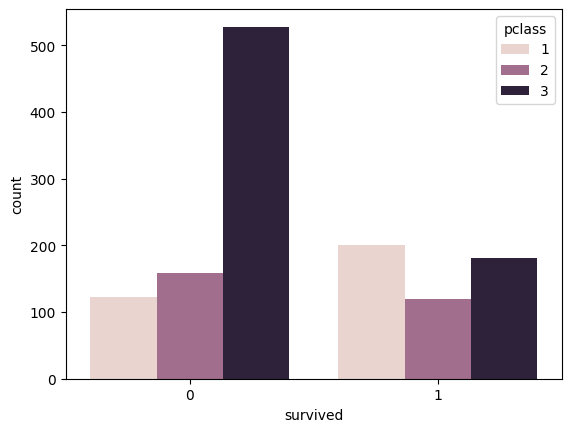

In [181]:
sns.countplot(x = 'survived',hue = 'pclass',data = df)

<Axes: ylabel='Frequency'>

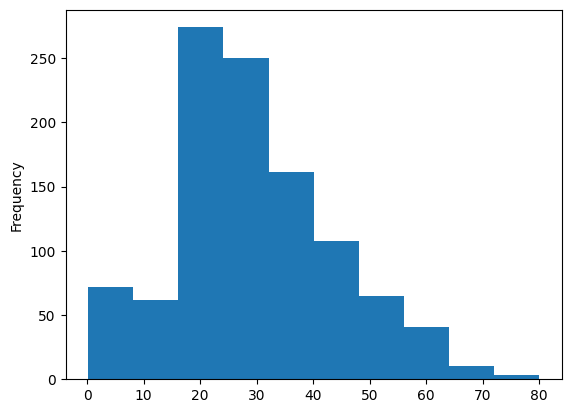

In [182]:
df['age'].plot.hist()

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pclass           1309 non-null   int64   
 1   name             1309 non-null   object  
 2   sex              1309 non-null   category
 3   age              1046 non-null   float64 
 4   sibsp            1309 non-null   int64   
 5   parch            1309 non-null   int64   
 6   ticket           1309 non-null   object  
 7   fare             1308 non-null   float64 
 8   cabin            295 non-null    object  
 9   embarked         1307 non-null   category
 10  boat             486 non-null    object  
 11  body             121 non-null    float64 
 12  home.dest        745 non-null    object  
 13  survived         1309 non-null   category
 14  family           1309 non-null   int64   
 15  travelled alone  1309 non-null   float64 
dtypes: category(3), float64(4), int64(4), obje

In [184]:
df.isna().sum()

,0
pclass,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014
embarked,2


<Axes: title={'center': 'Missing Values in Percentage'}, ylabel='Percentage'>

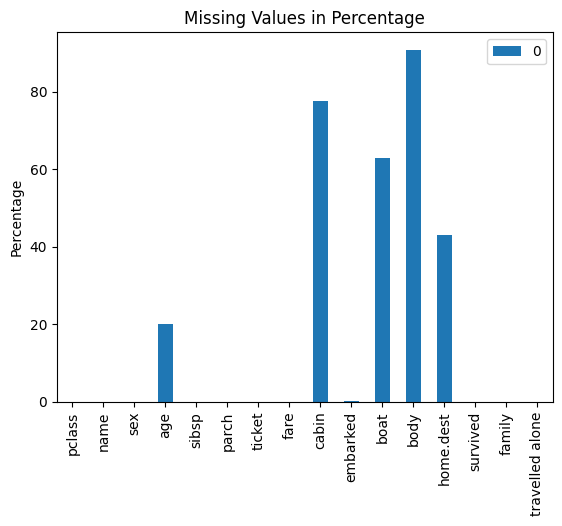

In [185]:
miss_values = pd.DataFrame(df.isnull().sum()/len(df)*100)

miss_values.plot(kind = 'bar',title = 'Missing Values in Percentage', ylabel = 'Percentage')

In [186]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0


In [187]:
df.drop(['name','ticket','sibsp','parch','home.dest'],axis = 1, inplace = True)

In [188]:
df.head()

,pclass,sex,age,fare,cabin,embarked,boat,body,survived,family,travelled alone
0,1,female,29.0000,211.3375,B5,S,2,NaN,1,0,1.0
1,1,male,0.9167,151.5500,C22 C26,S,11,NaN,1,3,0.0
2,1,female,2.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0
3,1,male,30.0000,151.5500,C22 C26,S,NaN,135.0,0,3,0.0
4,1,female,25.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0


In [189]:
df.drop(['cabin','body','boat'],axis =1 ,inplace = True)

In [190]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [191]:
sex = pd.get_dummies(df['sex'],drop_first = True)

In [192]:
print(sex)

       male
0     False
1      True
2     False
3      True
4     False
...     ...
1304  False
1305  False
1306   True
1307   True
1308   True

[1309 rows x 1 columns]


In [193]:
df['sex'] = sex.astype(int)

In [194]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled alone
0,1,0,29.0000,211.3375,S,1,0,1.0
1,1,1,0.9167,151.5500,S,1,3,0.0
2,1,0,2.0000,151.5500,S,0,3,0.0
3,1,1,30.0000,151.5500,S,0,3,0.0
4,1,0,25.0000,151.5500,S,0,3,0.0


In [195]:
df.isna().sum()

,0
pclass,0
sex,0
age,263
fare,1
embarked,2
survived,0
family,0
travelled alone,0


In [196]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy = 'mean')

In [197]:
df['age'] = imp_mean.fit_transform(df[['age']])
df['fare'] = imp_mean.fit_transform(df[['fare']])
#df['embarked'] = imp_mean.fit_transform(df[['embarked']])

In [198]:
df.isna().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,2
survived,0
family,0
travelled alone,0


In [199]:
imp_freq = SimpleImputer(strategy = 'most_frequent')


In [200]:
df['embarked'] = imp_freq.fit_transform(df[['embarked']]).ravel()

In [201]:
df.isna().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,0
survived,0
family,0
travelled alone,0


In [202]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled alone
0,1,0,29.0000,211.3375,S,1,0,1.0
1,1,1,0.9167,151.5500,S,1,3,0.0
2,1,0,2.0000,151.5500,S,0,3,0.0
3,1,1,30.0000,151.5500,S,0,3,0.0
4,1,0,25.0000,151.5500,S,0,3,0.0


In [203]:
embark = pd.get_dummies(df['embarked'],drop_first = True).astype(int)
print(embark)

      Q  S
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
...  .. ..
1304  0  0
1305  0  0
1306  0  0
1307  0  0
1308  0  1

[1309 rows x 2 columns]


In [204]:
df.drop(['embarked'],axis = 1,inplace = True)


In [205]:
df.head()

,pclass,sex,age,fare,survived,family,travelled alone
0,1,0,29.0000,211.3375,1,0,1.0
1,1,1,0.9167,151.5500,1,3,0.0
2,1,0,2.0000,151.5500,0,3,0.0
3,1,1,30.0000,151.5500,0,3,0.0
4,1,0,25.0000,151.5500,0,3,0.0


In [206]:
df = pd.concat([df,embark],axis = 1)

In [207]:
df.head()

,pclass,sex,age,fare,survived,family,travelled alone,Q,S
0,1,0,29.0000,211.3375,1,0,1.0,0,1
1,1,1,0.9167,151.5500,1,3,0.0,0,1
2,1,0,2.0000,151.5500,0,3,0.0,0,1
3,1,1,30.0000,151.5500,0,3,0.0,0,1
4,1,0,25.0000,151.5500,0,3,0.0,0,1


In [208]:
X = df.drop(['survived'],axis =1)
X.head()

,pclass,sex,age,fare,family,travelled alone,Q,S
0,1,0,29.0000,211.3375,0,1.0,0,1
1,1,1,0.9167,151.5500,3,0.0,0,1
2,1,0,2.0000,151.5500,3,0.0,0,1
3,1,1,30.0000,151.5500,3,0.0,0,1
4,1,0,25.0000,151.5500,3,0.0,0,1


In [209]:
y = df['survived']
y.head()

,survived
0,1
1,1
2,0
3,0
4,0


In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [212]:
print(X_train.shape,y_train.shape)

(916, 8) (916,)


In [213]:
print(X_test.shape,y_test.shape)

(393, 8) (393,)


In [214]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [215]:
pred = mod.predict(X_test)

In [216]:
from sklearn.metrics import accuracy_score

In [217]:
accuracy_score(y_test,pred)

0.7964376590330788